In [2]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
#from Legend import Legend
from ROOT import TLatex
from array import array
#SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);


### Get Data and MC files

In [8]:
#MCfile_name = '/home/dhruv/16c3c_0GeV30GeV_100K_newCorrelation.root'
#MCfile_name = '/home/dhruv/16c3c_0GeV30GeV_3M_wTpc.root'
#MCfile_name = '/home/dhruv/13b2_Jets_0GeV30GeV_200K_wTpc_ResCut.root'
#MCfile_name = '/home/dhruv/13b2_chargedJets_0GeV30GeV_all_wTpc_ResCut.root'
#MCfile_name = '/home/dhruv/18g7a_Jets_0GeV30GeV_100K_wTpc_ResCut.root'
#MCfile_name = '/home/dhruv/17g6a3_Jets_0GeV30GeV_100K_wTpc_ResCut.root'

#MB pPb
#MCfile_name = '/home/dhruv/13b2_Jets_0GeV30GeV_2M_wTpc_ResCut_wEtaPhi.root'
#MCfile_name = '/home/dhruv/13b2_Jets_0GeV30GeV_200K_newVar_8GeVcut.root'

#Gamma-Jet pPb
#MCfile_name = '/home/dhruv/17g6a1_Jets_0GeV30GeV_200K_newVar_8GeVcut.root'
#MCfile_name = '/home/dhruv/17g6a1_Jets_0GeV30GeV_200K_8GeVcut_phiRes.root'
#MCfile_name = '/home/dhruv/17g6a1_Jets_0GeV30GeV_200K_8GeVcut_jetFinding.root'

#Gamma-Jet pp
#MCfile_name = '/home/dhruv/18b10a_Jets_0GeV30GeV_100K_wTpc_ResCut_wEtaPhi.root'
#MCfile_name = '/home/dhruv/18b10a_Jets_0GeV30GeV_200K_newVar_8GeVcut.root'
#MCfile_name = '/home/dhruv/18b10a_Jets_0GeV30GeV_200K_8GeVcut_phiRes.root'
MCfile_name = '/home/dhruv/18b10a_Jets_0GeV30GeV_200K_8GeVcut_jetFinding.root'
#MCfile_name = '/home/dhruv/18b10a_Jets_0GeV30GeV_100Kevents_8GeVcut_jetFinding_new.root'

#Di-jet pPb

#Di-jet pp
#MCfile_name = '/home/dhruv/18g7a_Jets_0GeV30GeV_200K_8GeVcut_jetFinding.root'

#Datafile = ROOT.TFile('/home/dhruv/fout_16_13c_pass4_v1_0GevtrackSkim_pPb_1GeV16GeV_trig_zv_all_new.root')
MCfile = ROOT.TFile(MCfile_name)

### Get response Matrix and plot it, also true/reco ratio

Name: h_jetpt_correlation_its Title: Jet Response Matrix NbinsX: 30
Name: h_jetpt_correlation_its_px Title:  NbinsX: 30


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file Matrix_jets_its_pp_ppGJMC_18b10a_hCorrelation_its_old.pdf has been created


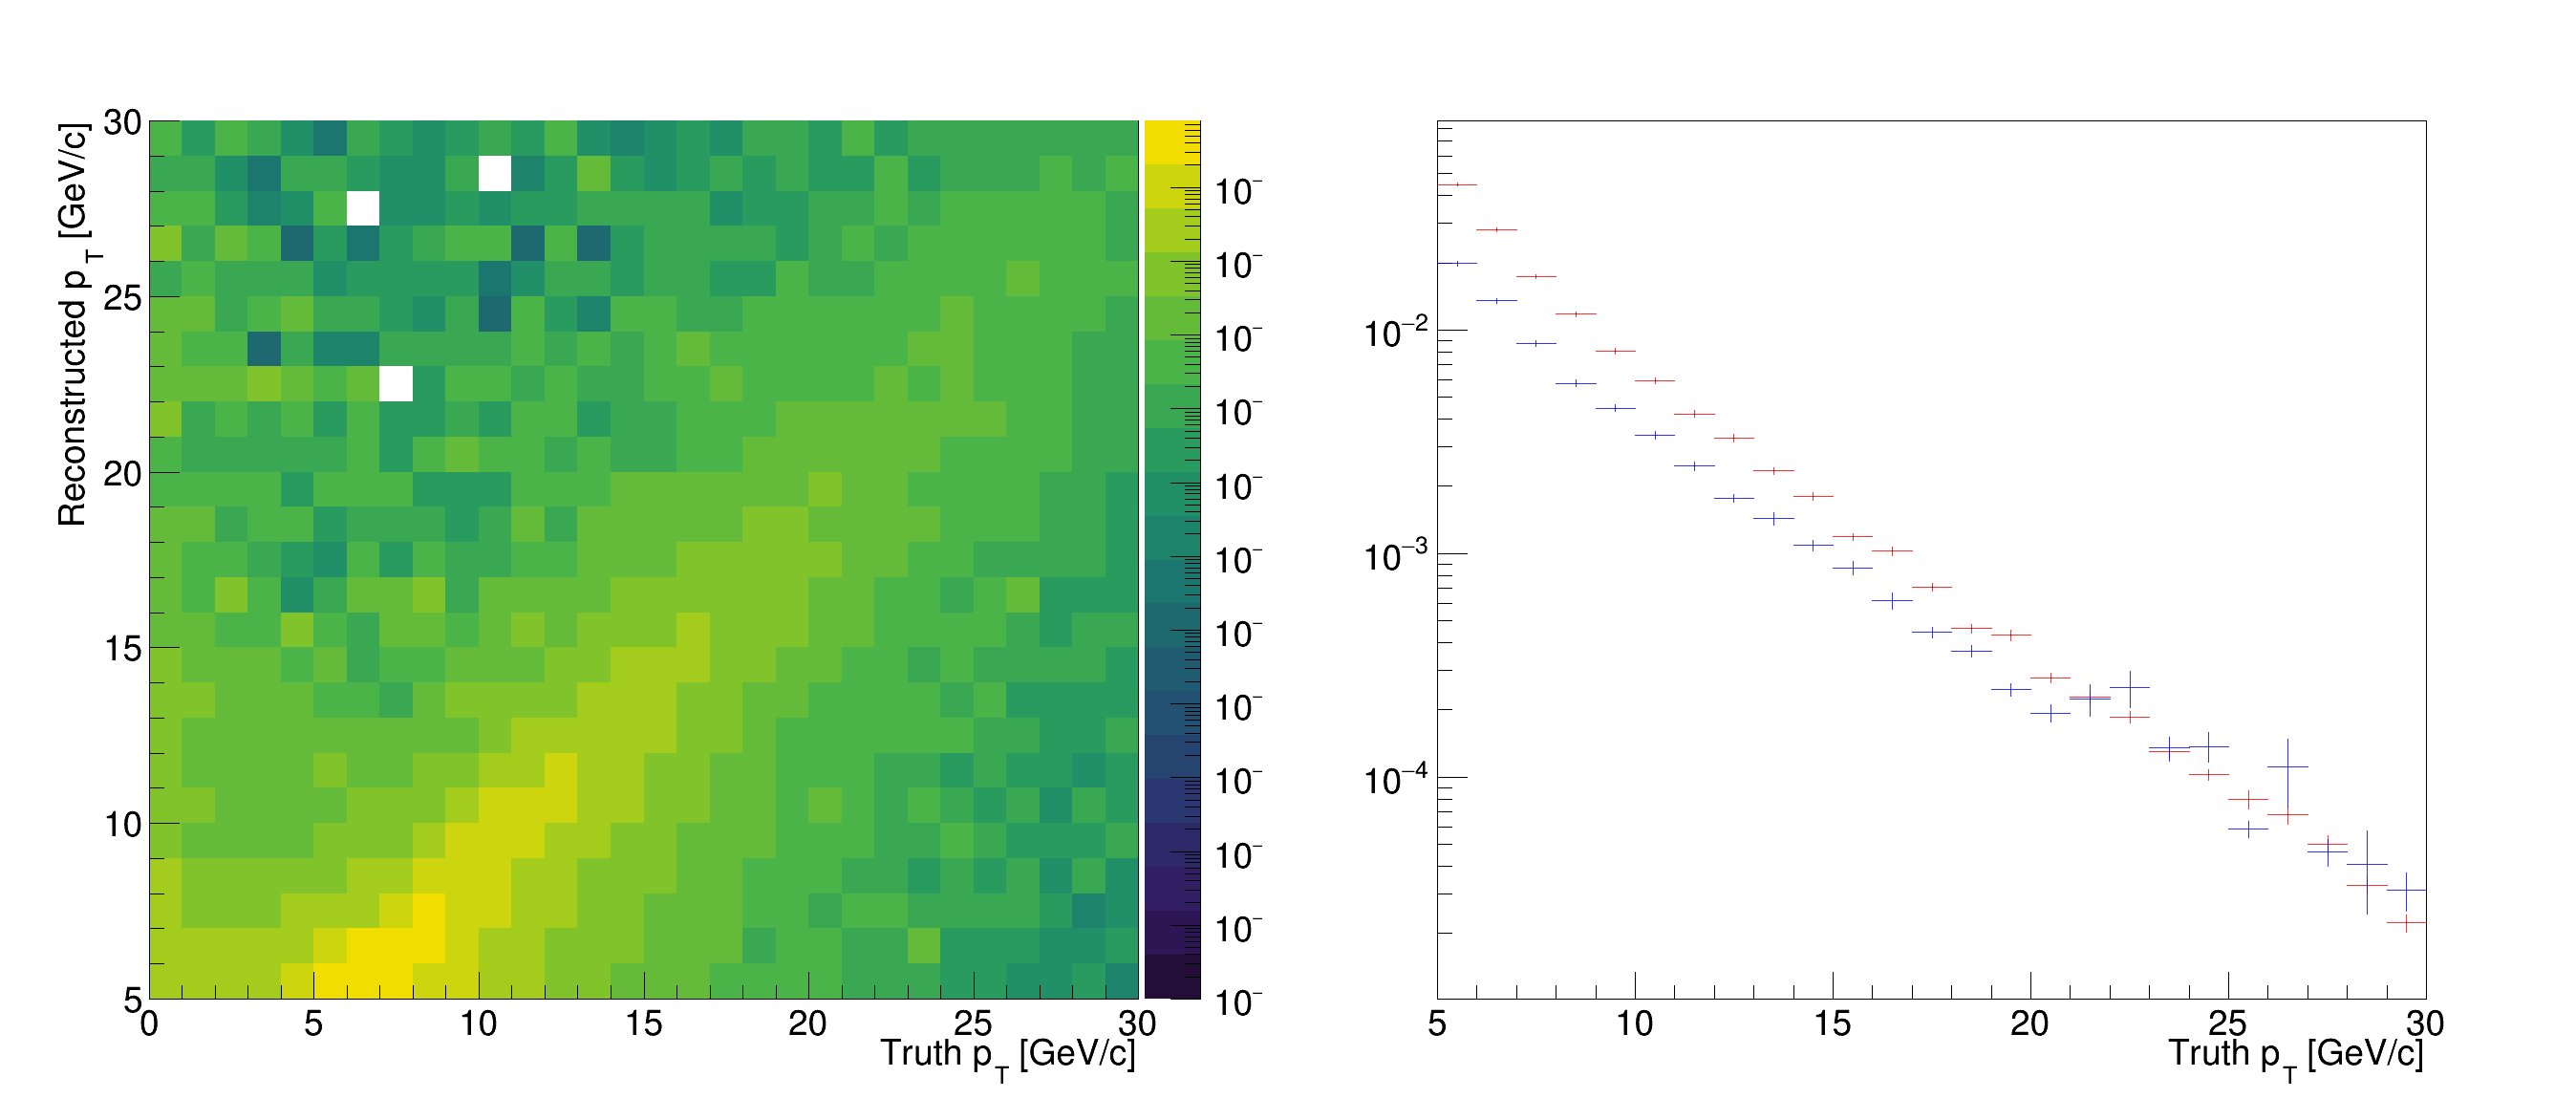

In [9]:
responseMatrix_its = MCfile.Get("hCorrelation_its");
print (responseMatrix_its)
#responseMatrix_its.Rebin2D(2,2)
responseMatrix_its.ClearUnderflowAndOverflow()
responseMatrix_its.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')
#responseMatrix_its.SetMinimum(1e-7)
        
mc_truth = responseMatrix_its.ProjectionX()
mc_reco = responseMatrix_its.ProjectionY()

print (mc_truth)

for i in range(mc_truth.GetNbinsX()):
    binWidth = mc_truth.GetBinWidth(i)
    binCon_truth = mc_truth.GetBinContent(i)
    binCon_reco = mc_reco.GetBinContent(i)
    mc_truth.SetBinContent(i, binCon_truth/binWidth)
    mc_reco.SetBinContent(i, binCon_reco/binWidth)
mc_truth.Sumw2()
mc_reco.Sumw2()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response Matrixx
c = ROOT.TCanvas('c','c',2700,1200)
c.Divide(2)
c.cd(1)
responseMatrix_its.SetMinimum(1e-14)
responseMatrix_its.GetYaxis().SetRangeUser(5,30)
responseMatrix_its.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco,'MC Reco','L')
#label.Add(mc_truth,'MC True','L')

mc_reco.GetXaxis().SetRangeUser(5,30)
mc_truth.GetXaxis().SetRangeUser(5,30)
mc_truth.Draw()
mc_reco.Draw('same')
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')
#hs_mc.SetTitle('; p_{T} [GeV/c]; counts')

#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
#c.cd(3)
#ratio_mc = mc_truth.Clone()
#ratio_mc.SetMinimum(0.0)
#ratio_mc.SetLineColor(1)
#ratio_mc.Divide(mc_reco)
#ratio_mc.Draw('e')
#ratio_mc.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_jets_its_pp_ppGJMC_18b10a_hCorrelation_its_old.pdf')

In [ ]:
responseMatrix_tpc = MCfile.Get("hCorrelation2_tpc");
print responseMatrix_tpc
#responseMatrix_tpc.Rebin2D(2,2)
responseMatrix_tpc.ClearUnderflowAndOverflow()
responseMatrix_tpc.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')
#responseMatrix_tpc.SetMinimum(1e-7)
        
mc_truth = responseMatrix_tpc.ProjectionX()
mc_reco = responseMatrix_tpc.ProjectionY()

print mc_truth

for i in range(mc_truth.GetNbinsX()):
    binWidth = mc_truth.GetBinWidth(i)
    binCon_truth = mc_truth.GetBinContent(i)
    binCon_reco = mc_reco.GetBinContent(i)
    mc_truth.SetBinContent(i, binCon_truth/binWidth)
    mc_reco.SetBinContent(i, binCon_reco/binWidth)
mc_truth.Sumw2()
mc_reco.Sumw2()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',2700,600)
c.Divide(2)
c.cd(1)
responseMatrix_tpc.SetMinimum(1e-14)
responseMatrix_tpc.GetYaxis().SetRangeUser(5,30)
responseMatrix_tpc.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

label = Legend("")
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')

mc_reco.GetXaxis().SetRangeUser(5,30)
mc_truth.GetXaxis().SetRangeUser(5,30)
mc_truth.Draw()
mc_reco.Draw('same')
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')
#hs_mc.SetTitle('; p_{T} [GeV/c]; counts')

label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
#c.cd(3)
#ratio_mc = mc_truth.Clone()
#ratio_mc.SetMinimum(0.0)
#ratio_mc.SetLineColor(1)
#ratio_mc.Divide(mc_reco)
#ratio_mc.Draw('e')
#ratio_mc.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_jets_tpc_full.pdf')

11
13
15
17


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


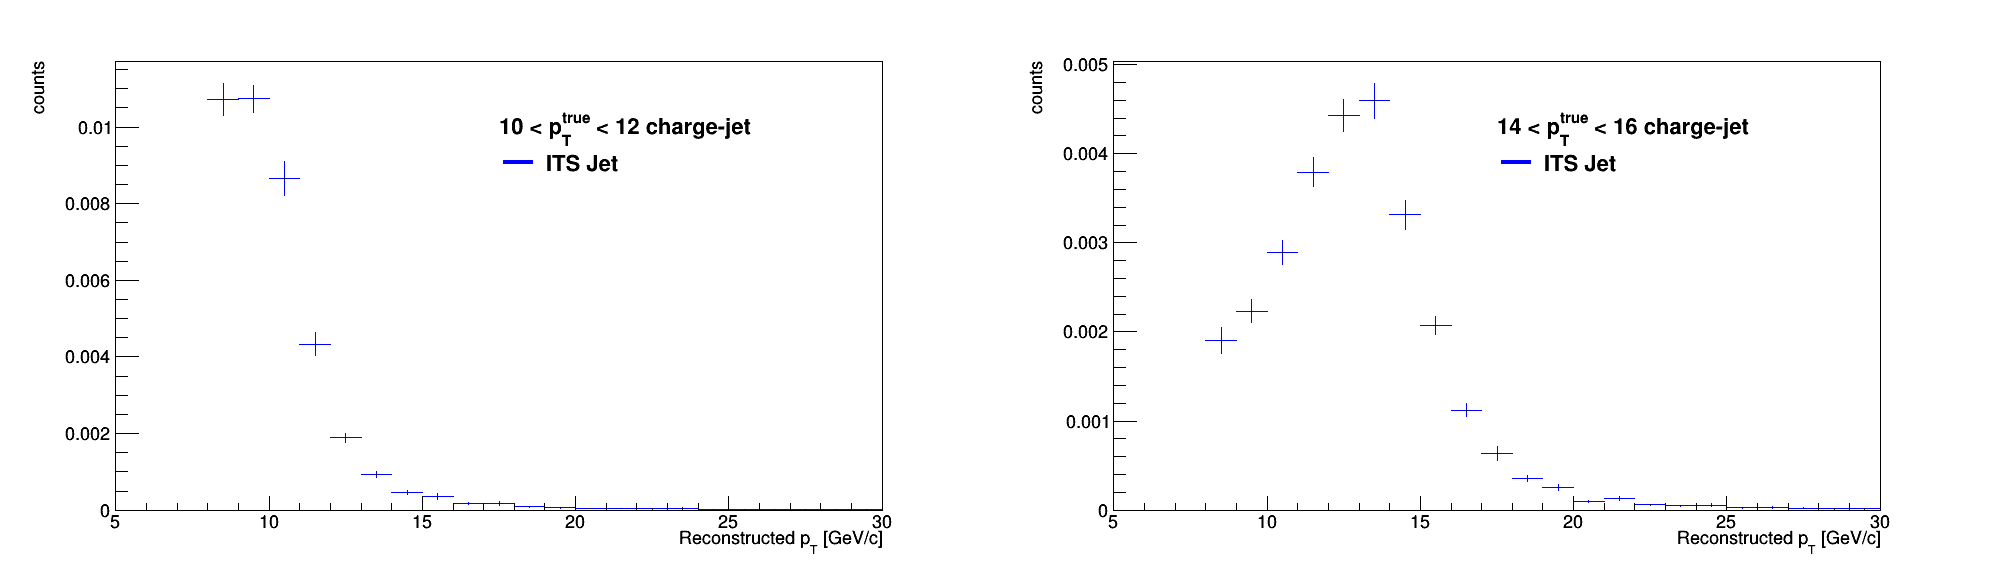

In [11]:
print responseMatrix_its.GetXaxis().FindBin(10)
print responseMatrix_its.GetXaxis().FindBin(12)
print responseMatrix_its.GetXaxis().FindBin(14)
print responseMatrix_its.GetXaxis().FindBin(16)

its10 = responseMatrix_its.ProjectionY('its10', 11, 13)
#tpc10 = responseMatrix_tpc.ProjectionY('tpc10', 11, 13)
its14 = responseMatrix_its.ProjectionY('its14', 15, 17)
#tpc14 = responseMatrix_tpc.ProjectionY('tpc14', 15, 17)

its10.GetXaxis().SetRangeUser(5,30)
#tpc10.GetXaxis().SetRangeUser(5,30)
its14.GetXaxis().SetRangeUser(5,30)
#tpc14.GetXaxis().SetRangeUser(5,30)

its10.GetYaxis().SetTitle('counts')
#tpc10.GetYaxis().SetTitle('counts')
its14.GetYaxis().SetTitle('counts')
#tpc14.GetYaxis().SetTitle('counts')


its10.SetLineColor(ROOT.kBlue)
#tpc10.SetLineColor(ROOT.kRed)
its14.SetLineColor(ROOT.kBlue)
#tpc14.SetLineColor(ROOT.kRed)
c = ROOT.TCanvas('c','c',2000,600)
c.Divide(2)

c.cd(1)
#ROOT.gPad.SetLogy()
label = Legend(title = '10 < p_{T}^{true} < 12 charge-jet')
label.Add(its10,'ITS Jet','L')
#label.Add(tpc10,'TPC Jet','L')
its10.Draw()
#tpc10.Draw('same')
label.Draw(0.5, 0.77)


c.cd(2)
#ROOT.gPad.SetLogy()
label2 = Legend(title = '14 < p_{T}^{true} < 16 charge-jet')
label2.Add(its14,'ITS Jet','L')
#label2.Add(tpc14,'TPC Jet','L')
its14.Draw()
#tpc14.Draw('same')
label2.Draw(0.5, 0.77)


c.Draw()
#c.SaveAs('fulljet_projections-10-14_pp.pdf')
#c.SaveAs('chargejet_projections-10-14_pPb.png')

4.0
16.0
1.0 1.0 1.0


Warning in <TH1D::Rebin>: ngroup=4 is not an exact divider of nbins=150.
Warning in <TH1D::Rebin>: ngroup=4 is not an exact divider of nbins=150.
Warning in <TH1D::Rebin>: ngroup=4 is not an exact divider of nbins=150.
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


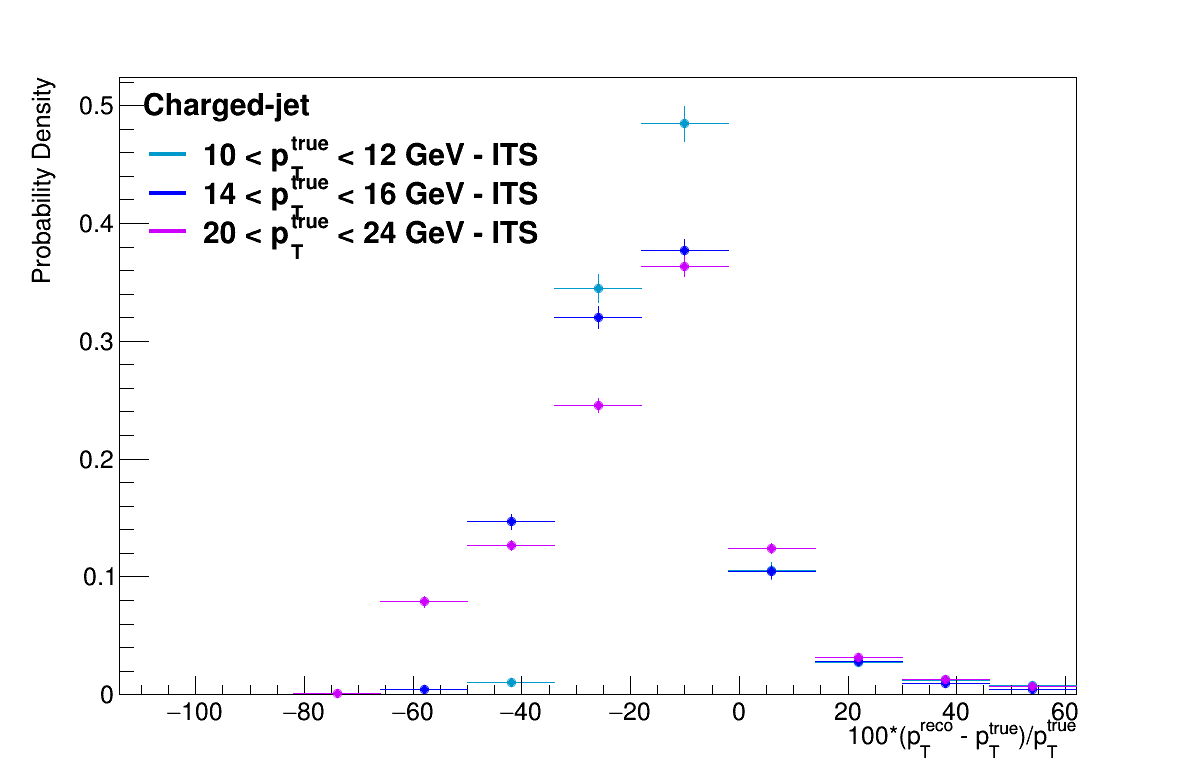

In [13]:
#resTPC = MCfile.Get('hRes_Pt_tpc')
resITS = MCfile.Get('hRes_Pt_its')

#resTPC.Scale(1/100)
#resITS.Scale(1/100)

#print resITS.GetXaxis().FindBin(20)
#print resITS.GetXaxis().FindBin(24)


res10_its = resITS.ProjectionY('res10_its', 11,13)
res14_its = resITS.ProjectionY('res14_its', 15,17)
res20_its = resITS.ProjectionY('res20_its', 21,25)

res10_its.SetTitle(';100*(p_{T}^{reco} - p_{T}^{true})/p_{T}^{true};Probability Density')

res10_its.SetLineColor(ROOT.kAzure+9)
res14_its.SetLineColor(ROOT.kBlue)
res20_its.SetLineColor(ROOT.kViolet+0)

res10_its.SetMarkerColor(ROOT.kAzure+9)
res14_its.SetMarkerColor(ROOT.kBlue)
res20_its.SetMarkerColor(ROOT.kViolet+0)

res10_its.SetMarkerStyle(20)
res14_its.SetMarkerStyle(20)
res20_its.SetMarkerStyle(20)

print res10_its.GetBinWidth(3)
res10_its.Rebin(4)
res14_its.Rebin(4)
res20_its.Rebin(4)
print res10_its.GetBinWidth(3)

norm = 1
res10_its.Scale(norm/res10_its.Integral())
res14_its.Scale(norm/res14_its.Integral())
res20_its.Scale(norm/res20_its.Integral())

#res10_tpc = resTPC.ProjectionY('res10_tpc', 11,13)
#res14_tpc = resTPC.ProjectionY('res14_tpc', 15,17)
#res20_tpc = resTPC.ProjectionY('res20_tpc', 21,25)

#res10_tpc.SetLineColor(ROOT.kOrange)
#res14_tpc.SetLineColor(ROOT.kRed)
#res20_tpc.SetLineColor(ROOT.kSpring-7)

#res10_tpc.SetMarkerColor(ROOT.kOrange)
#res14_tpc.SetMarkerColor(ROOT.kRed)
#res20_tpc.SetMarkerColor(ROOT.kSpring-7)

#res10_tpc.SetMarkerStyle(20)
#res14_tpc.SetMarkerStyle(20)
#res20_tpc.SetMarkerStyle(20)

#res10_tpc.Rebin(2)
#res14_tpc.Rebin(2)
#res20_tpc.Rebin(2)

#norm = 1
#res10_tpc.Scale(norm/res10_tpc.Integral())
#res14_tpc.Scale(norm/res14_tpc.Integral())
#res20_tpc.Scale(norm/res20_tpc.Integral())

print res10_its.Integral(), res14_its.Integral(), res20_its.Integral()

c = ROOT.TCanvas('c','c',1200,800)
label = Legend(title = 'Charged-jet')
label.Add(res10_its,'10 < p_{T}^{true} < 12 GeV - ITS','L')
label.Add(res14_its,'14 < p_{T}^{true} < 16 GeV - ITS','L')
label.Add(res20_its,'20 < p_{T}^{true} < 24 GeV - ITS','L')
#label.Add(res10_tpc,'10 < p_{T}^{true} < 12 GeV - TPC','L')
#label.Add(res14_tpc,'14 < p_{T}^{true} < 16 GeV - TPC','L')
#label.Add(res20_tpc,'20 < p_{T}^{true} < 24 GeV - TPC','L')


res10_its.GetXaxis().SetRangeUser(-100, 50)
#res20_tpc.GetYaxis().SetRangeUser(0, 1)
res10_its.Draw('same')
res14_its.Draw('same')
res20_its.Draw('same')
#res10_tpc.Draw('same')
#res14_tpc.Draw('same')
#res20_tpc.Draw('same')
label.Draw(0.12,0.85)
c.Draw()
#c.SaveAs('probabilityDensity_pp.png')
#c.SaveAs('probabilityDensity_pp.pdf')

### Get measured track pt spectrum

In [14]:
data = Datafile.Get('track_pt')
data.ClearUnderflowAndOverflow()
numEvents = 659038#747090.0 #pp events
max_eta = 1.6
#data.Scale(1/(numEvents*max_eta))
c.Clear()
data.Draw()
ROOT.gPad.SetLogy()
c.Draw()
#c.SaveAs('dataSpectrum_tracking_4Layers_pPb_its_all_noZ_13c.png')

NameError: name 'Datafile' is not defined

### Get and plot efficiency and fake rate

In [13]:
#Get efficiency and fake rate
efficiency = MCfile.Get("hRecoTruth_its").Clone()
efficiency.Divide(MCfile.Get("hTruth_its"))
#fakerate   = MCfile.Get("FakeRate");

#Plot efficiency and fake rate
efficiency.SetTitle(' ; p_{T} [GeV];')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.0)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
efficiency.GetXaxis().SetRangeUser(.15,2)
#fakerate.SetMarkerStyle(20)
#fakerate.SetLineColor(4)
#fakerate.SetMarkerColor(4)

c = ROOT.TCanvas('c','c',600,600)
efficiency.Draw()
#fakerate.Draw('same')

label = Legend("")
label.Add(efficiency,'Efficiency','L')
#label.Add(fakerate,'Fake rate','L')
label.Draw(.25,.91)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_lowpt.pdf')

ReferenceError: attempt to access a null-pointer

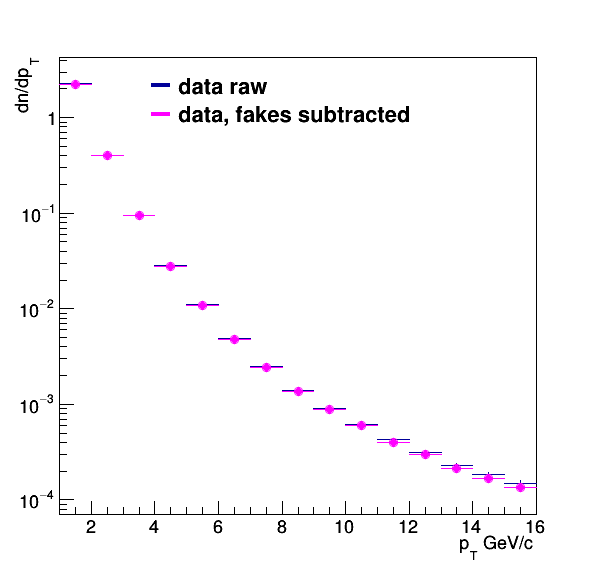

In [18]:
data_bkgsub = data.Clone()
for i in range(1,fakerate.GetNbinsX()+1):
    bkg = data.GetBinContent(i)*fakerate.GetBinContent(i)
    data_bkgsub.SetBinContent(i,data.GetBinContent(i)-bkg)

c.Clear()
data.Draw()
data_bkgsub.SetLineColor(ROOT.kMagenta)
data_bkgsub.SetMarkerColor(ROOT.kMagenta)
data_bkgsub.SetMarkerStyle(20)

data_bkgsub.Draw('same')
ROOT.gPad.SetLogy()
label = Legend("")
label.Add(data,'data raw','L')
label.Add(data_bkgsub,'data, fakes subtracted','L')
label.Draw(.25,.9)
c.Draw()
#c.SaveAs('FakeRate_sub_tracking_tpc.pdf')


### DEFINE DATA FOR UNFOLDING 

In [19]:
data_inputforunfolding = data_bkgsub.Clone()
#data_inputforunfolding = data.Clone()

### UNFOLDING 

In [31]:
response= RooUnfoldResponse(mc_reco, mc_truth, responseMatrix)
response.UseOverflow(ROOT.kFALSE)
data_unfolded = {}
#for tau in range(4,6):
#    data_unfolded['SVD%i'%tau] = RooUnfoldSvd(response, data_inputforunfolding, tau).Hreco();

data_unfolded['SVD8'] = RooUnfoldSvd(response, data_inputforunfolding, 4).Hreco();
data_unfolded['SVD9'] = RooUnfoldSvd(response, data_inputforunfolding, 5).Hreco();

print data_unfolded

{'SVD9': <ROOT.TH1D object ("hCorrelation_cor") at 0x755e6e0>, 'SVD8': <ROOT.TH1D object ("hCorrelation_cor") at 0x74e5c70>}
SVD init 15 x 15 bins, kreg=4
SVD init 15 x 15 bins, kreg=5


Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 4
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 0.010770
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 5
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 0.014158


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


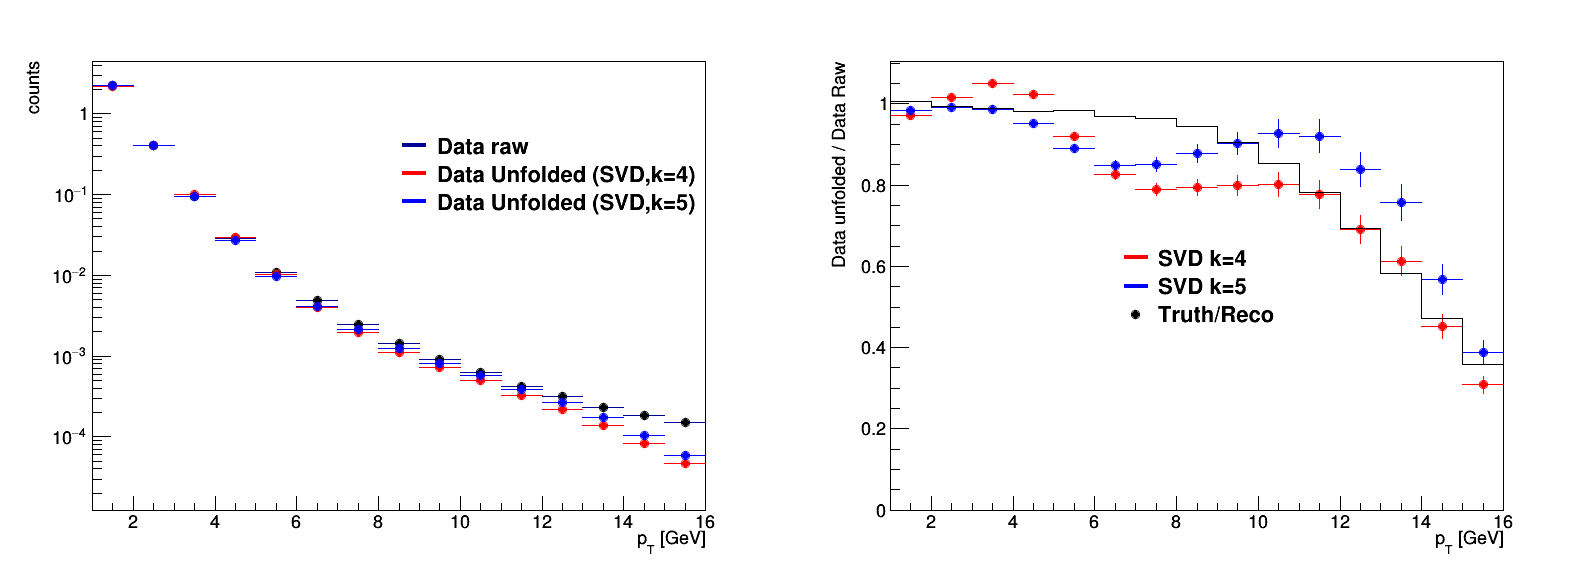

In [32]:
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
label = Legend("")

hstack = ROOT.THStack()
hstack.Add(data)
label.Add(data,'Data raw','L')

data.SetMarkerStyle(20)
data_unfolded['SVD8'].SetLineColor(2)
data_unfolded['SVD8'].SetMarkerColor(2)
data_unfolded['SVD8'].SetMarkerStyle(20)
data_unfolded['SVD9'].SetLineColor(4)
data_unfolded['SVD9'].SetMarkerColor(4)
data_unfolded['SVD9'].SetMarkerStyle(20)

hstack.Add(data_unfolded['SVD8'])
hstack.Add(data_unfolded['SVD9'])
label.Add(data_unfolded['SVD8'], 'Data Unfolded (SVD,k=4)','L')
label.Add(data_unfolded['SVD9'], 'Data Unfolded (SVD,k=5)','L')
               
hstack.SetTitle('; p_{T} [GeV]; counts')
hstack.Draw('nostack')
ROOT.gPad.SetLogy()
label.Draw(.5,.8)
c.cd(2)

hs_ratio = ROOT.THStack()
label = Legend("")

ratio = {}
ratio['SVD8'] = data_unfolded['SVD8'].Clone()
ratio['SVD8'].Divide(data) 
ratio['SVD9'] = data_unfolded['SVD9'].Clone()
ratio['SVD9'].Divide(data) 

hs_ratio.Add( ratio['SVD8'])
hs_ratio.Add( ratio['SVD9'])

label.Add(ratio['SVD8'],'SVD k=4','L')
label.Add(ratio['SVD9'],'SVD k=5','L')

#simple bin-by-bin unfolding
ratio_mc.SetMarkerStyle(20)
ratio_mc.SetMarkerSize(1)
ratio_mc.SetMarkerColor(1)

hs_ratio.Add(ratio_mc)

hs_ratio.SetTitle('; p_{T} [GeV]; Data unfolded / Data Raw')
hs_ratio.Draw('nostack')
label.Add(ratio_mc, 'Truth/Reco','P')
label.Draw(.4,.6)
c.Draw()
#c.SaveAs('Unfoldedresult_tracking_its_4Layers.png')

# Published data

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


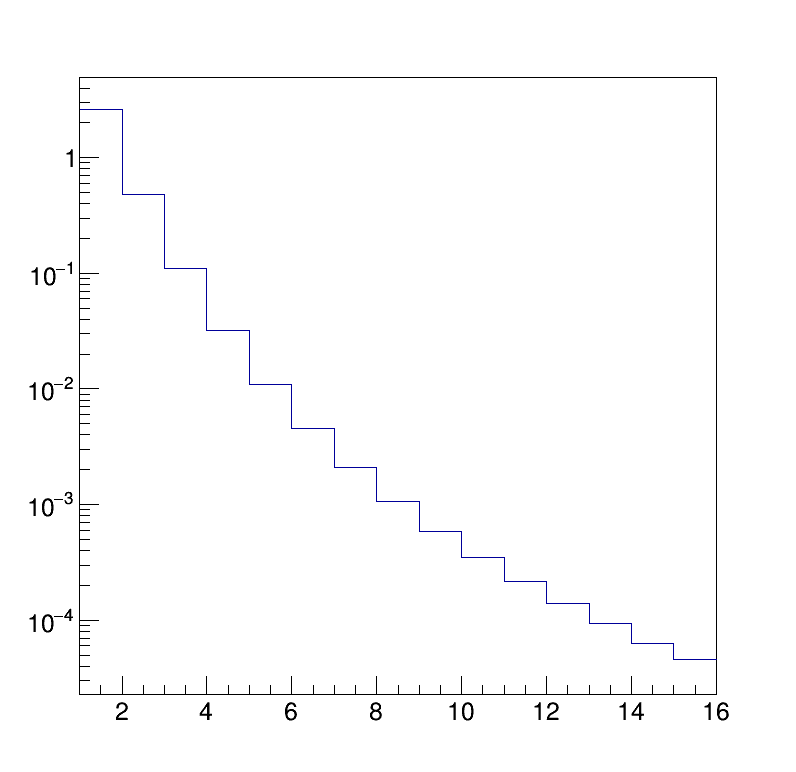

In [22]:
#pPb pubilshed data
binned_data = [2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 4.52E-03, 2.08E-03, 
               1.06E-03, 5.87E-04, 3.47E-04, 2.16E-04, 1.39E-04, 9.39E-05, 6.32E-05, 4.53E-05]
h = ROOT.TH1F('binned_data','', 15,1.0,16.0)
for i in range(len(binned_data)):
    #print i+1, ' ' , binned_data[i]
    h.SetBinContent(i+1,binned_data[i])
    h.SetBinError(i+1,0.0)
    

c= ROOT.TCanvas('c','c',800,800)
h.Draw('hist')
c.SetLogy()
c.Draw()

##EFFICIENCY CORRECTION

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


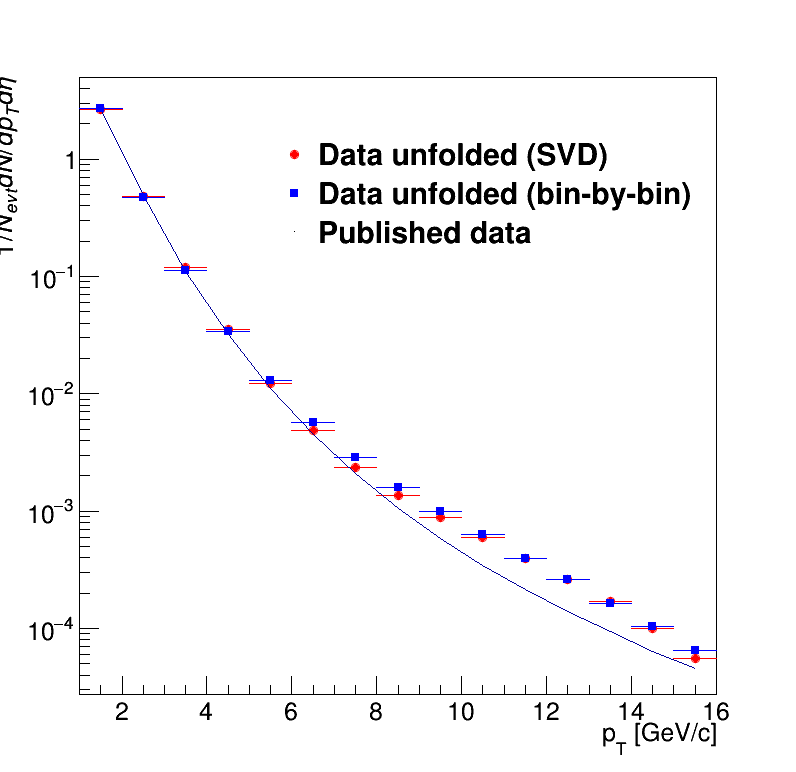

In [33]:
#efficiency.Print()
#applying efficiency
def applyEfficiencyCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        #efficiency.(i-1,pt,eff)
        #print pt, eff
        eff = efficiency.GetBinContent(i)
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)/eff)
        histo_corrected.SetBinError(i,histo.GetBinError(i)/eff)
    return histo_corrected


data_unfolded_SVD_4_corrected = applyEfficiencyCorrection(data_unfolded['SVD8'])
data_unfolded_SVD_5_corrected = applyEfficiencyCorrection(data_unfolded['SVD9'])

data_corrected = data.Clone()
data_onlyeff   = data.Clone()

data_corrected.Multiply(ratio_mc) #applying "naive unfolding"
data_onlyeff = applyEfficiencyCorrection(data_onlyeff)


data_corrected= applyEfficiencyCorrection(data_corrected)
c= ROOT.TCanvas('c','c',800,800)
#c.Divide(2)
#c.cd(1)
data_unfolded_SVD_4_corrected.SetTitle('; p_{T} [GeV/c]; 1/N_{evt} dN/dp_{T}d\eta')
data_unfolded_SVD_4_corrected.SetMarkerStyle(20)
data_unfolded_SVD_4_corrected.SetMarkerColor(2)
#data_unfolded_SVD_4_corrected.GetXaxis().SetRangeUser(1,12)
data_unfolded_SVD_4_corrected.Draw()
data_unfolded_SVD_5_corrected.SetMarkerStyle(21)
data_unfolded_SVD_5_corrected.SetMarkerColor(ROOT.kOrange+1)
data_unfolded_SVD_5_corrected.SetLineColor(ROOT.kOrange+1)
#data_unfolded_SVD_5_corrected.Draw('same')
h.Draw('histLsame')
data_corrected.SetTitle('; p_{T} [GeV/c]; 1/N_{evt} dN/dp_{T}d\eta')
data_corrected.SetMarkerColor(4)
data_corrected.SetLineColor(4)
#data_corrected.Draw('histsame')
data_corrected.SetMarkerStyle(21)
data_onlyeff.SetLineColor(3)
data_onlyeff.SetMarkerColor(3)
data_onlyeff.SetMarkerStyle(21)
#data_onlyeff.Draw('histsame')
data_corrected.SetMarkerStyle(21)
data_corrected.Draw('same')

label = Legend("")
label.Add(data_unfolded_SVD_4_corrected,'Data unfolded (SVD)')
label.Add(data_corrected,'Data unfolded (bin-by-bin)')
#label.Add(data_unfolded_SVD_5_corrected,'Data unfolded (SVD k=5) + eff corr.','L')
label.Add(h,'Published data')
#label.Add(data_onlyeff,'Data + eff corr.','L')
#label.Add(data_corrected,'Data unfolded (bin-by-bin) + eff corr.','L')
label.Draw(.35,.85)

ROOT.gPad.SetLogy()



#c.SaveAs('UnfoldedSpectraAndPublishedResult_tracking_pPb_its_4Layers.png')
c.Draw()

In [34]:
def printHisto(histo):
    values = []
    for i in range(1,histo.GetNbinsX()+1):
        width = histo.GetBinWidth(i)/2.0
        center = histo.GetBinCenter(i)
        content = histo.GetBinContent(i)
        #print '%2.2f--%2.2f = %2.5f, %2.5f' %(center-width,center+width,content, content*width*2.0)
        #print '%2.5f' %(content*width*2.0)
        #print '%2.2f--%2.2f' %(center-width,center+width)
        #print '%2.5f' %(content)
        values.append(content)
    print ' '
    return values


In [35]:
ratio_data_unfolded_SVD_4_corrected = data_unfolded_SVD_4_corrected.Clone()
ratio_data_unfolded_SVD_5_corrected = data_unfolded_SVD_5_corrected.Clone()
ratio_data_corrected                = data_corrected.Clone()
ratio_unity                         = h.Clone()

ratio_data_unfolded_SVD_4_corrected.Divide(h)
ratio_data_unfolded_SVD_5_corrected.Divide(h)
ratio_data_corrected.Divide(h)
ratio_unity.Divide(h)

True

Warning in <TH1D::Divide>: Dividing histograms with different bin limits
Warning in <TH1D::Divide>: Dividing histograms with different bin limits
Warning in <TH1F::Divide>: Dividing histograms with different bin limits


In [36]:
ratio_data_raw = data.Clone()
ratio_data_raw.Divide(h)
ratio_data_bkgsub = data_bkgsub.Clone()
ratio_data_bkgsub.Divide(h)

ratio_data_unfoldedSVD4 = data_unfolded['SVD8'].Clone()
ratio_data_unfoldedSVD4.Divide(h)


True

Warning in <TH1F::Divide>: Dividing histograms with different bin limits
Warning in <TH1F::Divide>: Dividing histograms with different bin limits
Warning in <TH1D::Divide>: Dividing histograms with different bin limits


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


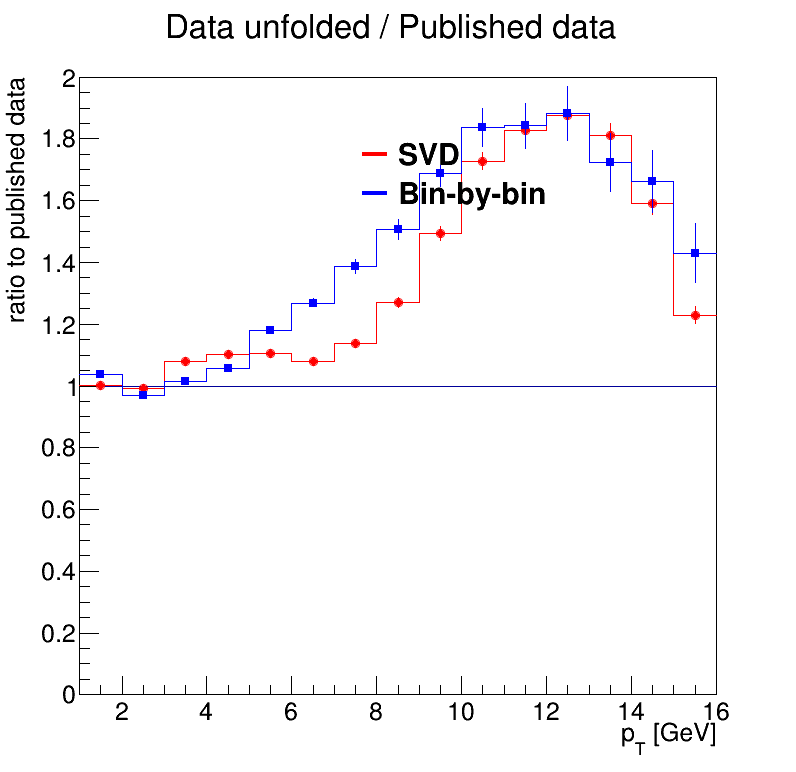

In [37]:
c= ROOT.TCanvas('c','c',800,800)


ratio_unity.Draw("histsame")
ratio_unity.SetTitle('; p_{T} [GeV]; ratio to published data')
ratio_unity.SetTitle('Data unfolded / Published data')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
ratio_data_unfolded_SVD_4_corrected.Draw('histesame')
#ratio_data_unfolded_SVD_5_corrected.Draw('histsame')
ratio_data_corrected.Draw('histesame')
#ratio_data_raw.Draw("histsame")
#ratio_data_bkgsub.Draw("histsame")
#ratio_data_unfoldedSVD4.Draw("histsame")

label = Legend("")
label.Add(ratio_data_unfolded_SVD_4_corrected,'SVD','L')
#label.Add(ratio_data_unfolded_SVD_5_corrected,'SVD k=5 + eff corr.','L')
label.Add(ratio_data_corrected,'Bin-by-bin','L')
label.Draw(.45,.85)

c.Draw()
#c.SaveAs('Comparison_Unfolded_tracking_pPb_its_4Layers_all_new_corSVD4_13b.png')


# Refolding

In [38]:
##refolding the distribution:
def applyEfficiencyUnCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        #efficiency.GetPoint(i-1,pt,eff)
        #print pt, eff
        eff = efficiency.GetBinContent(i)
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)*eff)
        histo_corrected.SetBinError(i,histo.GetBinError(i)*eff)
    return histo_corrected

for i in range(responseMatrix.GetNbinsX()):
    ySliceSum = float(0.0)
    for j in range(responseMatrix.GetNbinsY()):
        tempCont = responseMatrix.GetBinContent(i+1, j+1)
        ySliceSum = ySliceSum + tempCont
    #print "ySliceSum = ", ySliceSum, "bin: ", i+1
    for j in range (responseMatrix.GetNbinsY()+1):
        tempCont = responseMatrix.GetBinContent(i+1, j+1)
        newCont = tempCont/ySliceSum
        responseMatrix.SetBinContent(i+1, j+1, newCont)
        

# h=published data 
h_wEff = applyEfficiencyUnCorrection(h)
h_wEff.SetLineColor(ROOT.kRed)
N = h_wEff.GetNbinsX()#data_unfolded['SVD8'].GetNbinsX()


data_refolded= h_wEff.Clone()#data_unfolded['SVD9'].Clone()
data_refolded.SetLineColorAlpha(4,0.5)

for ireco in range(1,N+1):
    temp = 0
    for itruth in range(1,N+1):
        #print responseMatrix.GetBinContent(itruth,ireco)
        #print data_unfolded['SVD'].GetBinContent(itruth)
        temp += responseMatrix.GetBinContent(itruth,ireco)*h_wEff.GetBinContent(itruth)
    data_refolded.SetBinContent(ireco, temp)
 
integralBins = 1

print h.Integral()
print h_wEff.Integral()
print data_refolded.Integral()


3.26805130105
2.74366759288
2.74366774075


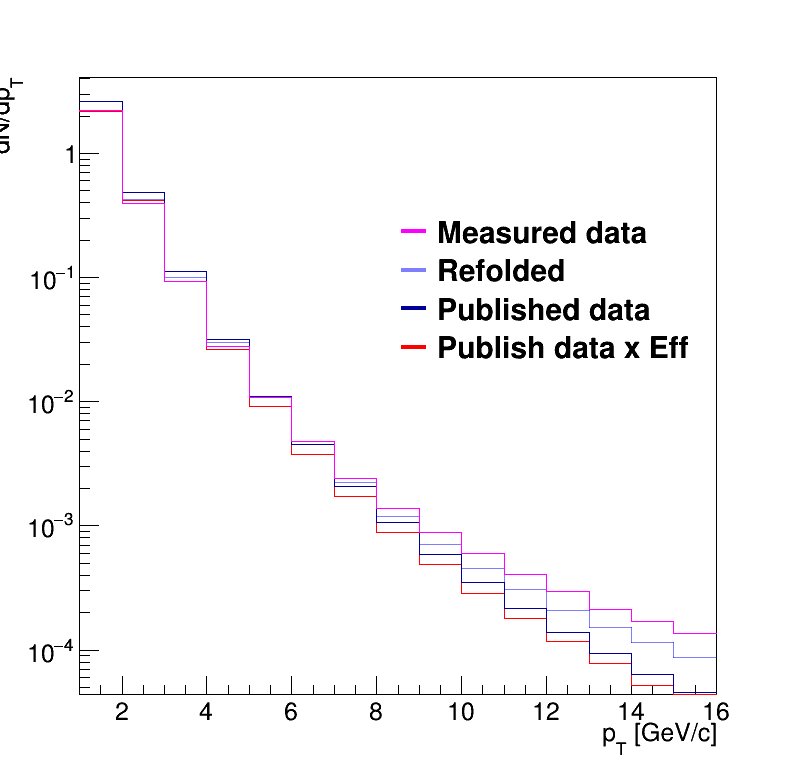

In [39]:
#plotting the refolded results
c.Clear()

data_refolded.Draw()
data_refolded.SetTitle(";p_{T} [GeV/c];dN/dp_{T}")
h_wEff.Draw('histsame')
h.Draw('histsame')
data_bkgsub.Draw('histsame')


label = Legend("")
label.Add(data_bkgsub,'Measured data','L')
label.Add(data_refolded,'Refolded','L')
label.Add(h,'Published data','L')
label.Add(h_wEff,'Publish data x Eff','L')
label.Draw(.5,.75)

c.SetLogy()
c.Draw()
#c.SaveAs('refolding_pPb_tpc.pdf')

In [40]:
ratio_refold_pub = h_wEff.Clone()
ratio_refold_pub.Divide(data_refolded)

ratio_refold_data_sub = data_bkgsub.Clone()
ratio_refold_data_sub.Divide(data_refolded)

ratio_refold_data = data.Clone()
ratio_refold_data.Divide(data_refolded)

True

Warning in <TH1F::Divide>: Dividing histograms with different bin limits
Warning in <TH1F::Divide>: Dividing histograms with different bin limits


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


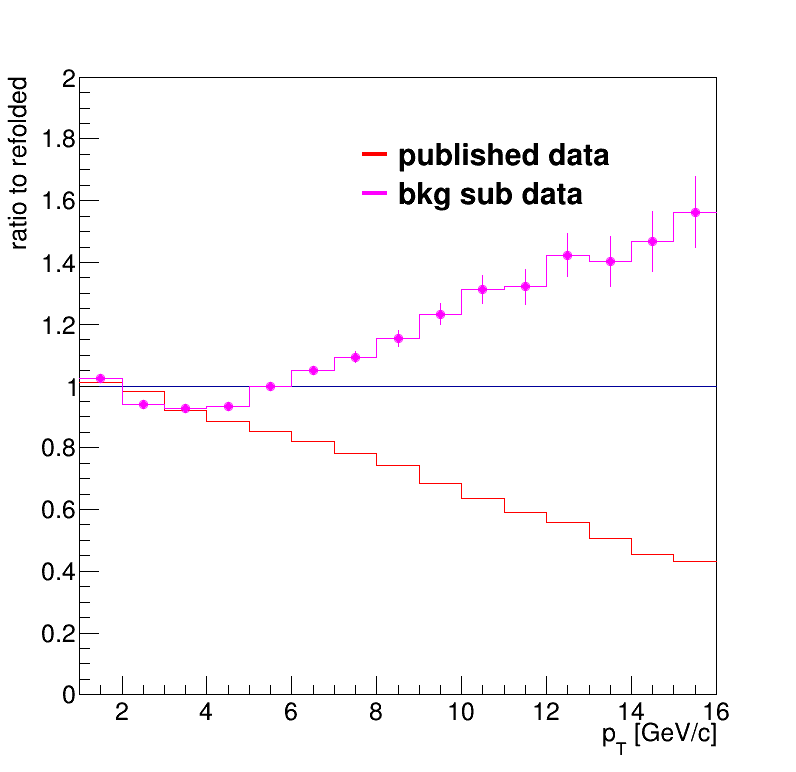

In [41]:
c= ROOT.TCanvas('c','c',800,800)

ratio_unity = h.Clone()
ratio_unity.Divide(h)
ratio_unity.SetTitle('; p_{T} [GeV/c]; ratio to refolded')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
#ratio_unity.GetXaxis().SetRangeUser(1,12)
#ratio_refold_unfoldedSVD.Draw('histsame')
#ratio_refold_data.Draw('histesame')
ratio_unity.Draw('hist')
ratio_refold_pub.Draw('histesame')
ratio_refold_data_sub.Draw('histesame')

label = Legend("")
#label.Add(ratio_refold_data,'raw data','L')
label.Add(ratio_refold_pub,'published data','L')
label.Add(ratio_refold_data_sub,'bkg sub data','L')
label.Draw(.45,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pPb_tpc.pdf')

# Eta Phi Comparison

In [3]:
hEtaMC = MCfile.Get('hReco_eta')
hPhiMC = MCfile.Get('hReco_phi')

hEtaData = Datafile.Get('hReco_eta')
hPhiData = Datafile.Get('hReco_phi')

#hEtaMC.Scale(hEtaData.Integral()/hEtaMC.Integral())
#hPhiMC.Scale(hPhiData.Integral()/hPhiMC.Integral())

c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
label = Legend("")

hEtaStack = ROOT.THStack()
hEtaMC.SetLineColor(2)
hEtaMC.SetMarkerColor(2)
hEtaMC.SetMarkerStyle(20)
hEtaData.SetLineColor(4)
hEtaData.SetMarkerColor(4)
hEtaData.SetMarkerStyle(20)
hEtaMC.SetTitle('; #eta; counts')
hEtaData.SetTitle('; #eta; counts')
hEtaMC.SetMinimum(0.0)
hEtaData.SetMinimum(0.0)


#hEtaStack.Add(hEtaMC)
#hEtaStack.Add(hEtaData)
hEtaMC.DrawNormalized('hist')
hEtaData.DrawNormalized('histsame')
label.Add(hEtaMC, 'Monte Carlo','L')
label.Add(hEtaData, 'Data','L')
               
#hEtaStack.SetTitle('; #eta; counts')
#hEtaStack.Draw('nostack')
#ROOT.gPad.SetLogy()
label.Draw(.7,.3)
c.cd(2)

hPhiStack = ROOT.THStack()
label = Legend("")

hPhiStack = ROOT.THStack()
hPhiMC.SetLineColor(2)
hPhiMC.SetMarkerColor(2)
hPhiMC.SetMarkerStyle(20)
hPhiData.SetLineColor(4)
hPhiData.SetMarkerColor(4)
hPhiData.SetMarkerStyle(20)
hPhiMC.SetTitle('; #phi; counts')
hPhiData.SetTitle('; #phi; counts')
hPhiMC.SetMinimum(0.0)
hPhiData.SetMinimum(0.0)

#hPhiStack.Add(hPhiMC)
#hPhiStack.Add(hPhiData)
hPhiMC.DrawNormalized('hist')
hPhiData.DrawNormalized('histsame')
label.Add(hPhiMC, 'Monte Carlo','L')
label.Add(hPhiData, 'Data','L')
               
#hPhiStack.SetTitle('; #phi; counts')
#hPhiStack.Draw('nostack')
#ROOT.gPad.SetLogy()
label.Draw(.7,.8)
c.Draw()
#c.SaveAs("EtaPhi_distribution_pPb.png")

NameError: name 'Datafile' is not defined

# Eta/Phi Efficiency

80


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file jet_etaPhi_eff_its_pp_dijet.png has been created


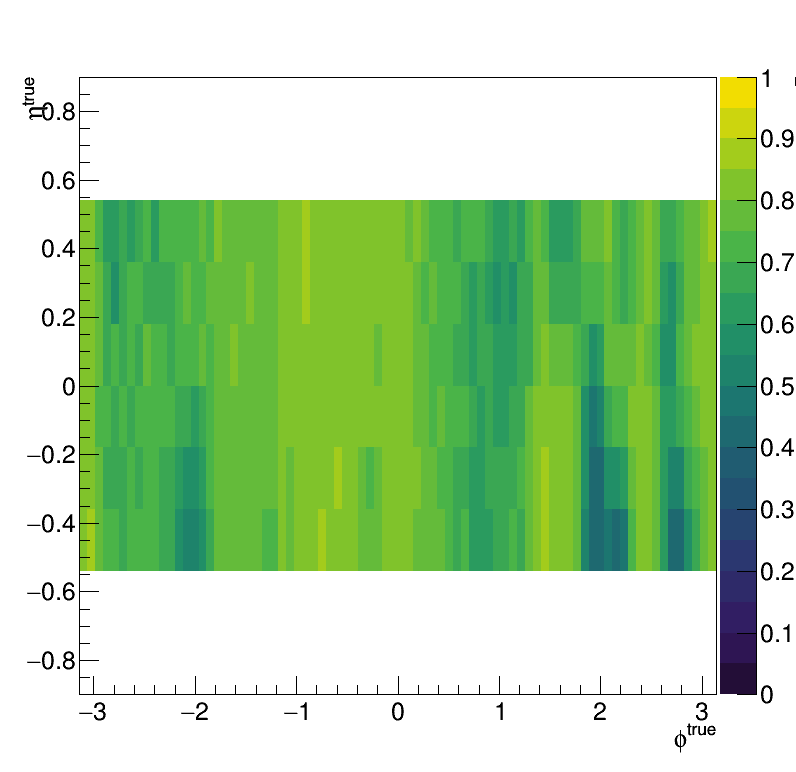

In [22]:
hRecoTruth_etaphi = MCfile.Get('hRecoTruth_phiEta_its')
hTruth_etaphi = MCfile.Get('hTruth_phiEta_its')

h2DEff = hRecoTruth_etaphi.Clone()
h2DEff.Divide(hTruth_etaphi)
h2DEff.SetTitle(';#phi^{true};#eta^{true};#epsilon')
#h2DEff.GetZaxis().SetRangeUser(0.0,1.5)
h2DEff.SetMinimum(0)
h2DEff.SetMaximum(1)

print hRecoTruth_etaphi.GetNbinsX()

c= ROOT.TCanvas('c','c',800,800)

h2DEff.Draw('colz')
c.Draw()
#c.SaveAs('jet_etaPhi_eff_its_pPb.pdf')
#c.SaveAs('jet_etaPhi_eff_its_pp_dijet.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


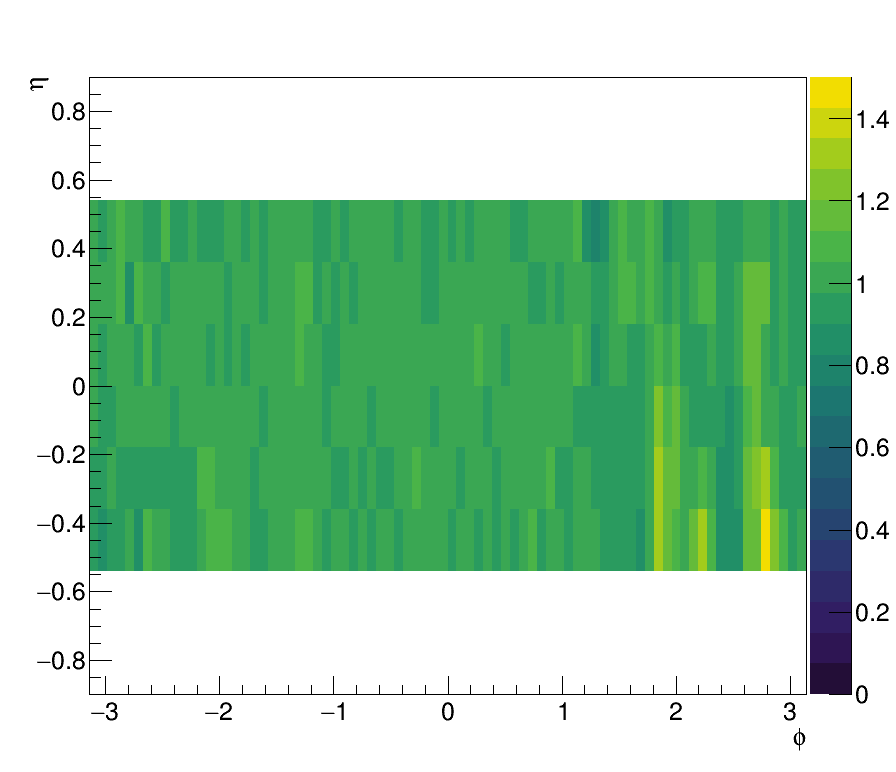

In [16]:
hReco_etaphi = MCfile.Get('hReco_phiEta_its')

h2DBinbyBin = hRecoTruth_etaphi.Clone()
h2DBinbyBin.Divide(hReco_etaphi)
h2DBinbyBin.SetTitle(';#phi;#eta;#epsilon')
#h2DEff.GetZaxis().SetRangeUser(0.0,1.5)
h2DBinbyBin.SetMinimum(0)
h2DBinbyBin.SetMaximum(1.5)

c= ROOT.TCanvas('c','c',900,800)

h2DBinbyBin.Draw('colz')
c.Draw()
#c.SaveAs('jet_etaPhi_BinbyBin_its_pPb.pdf')
#c.SaveAs('jet_etaPhi_BinbyBin_its_pPb_8GeV.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file jets_etaPhi_its_pp_dijet.png has been created


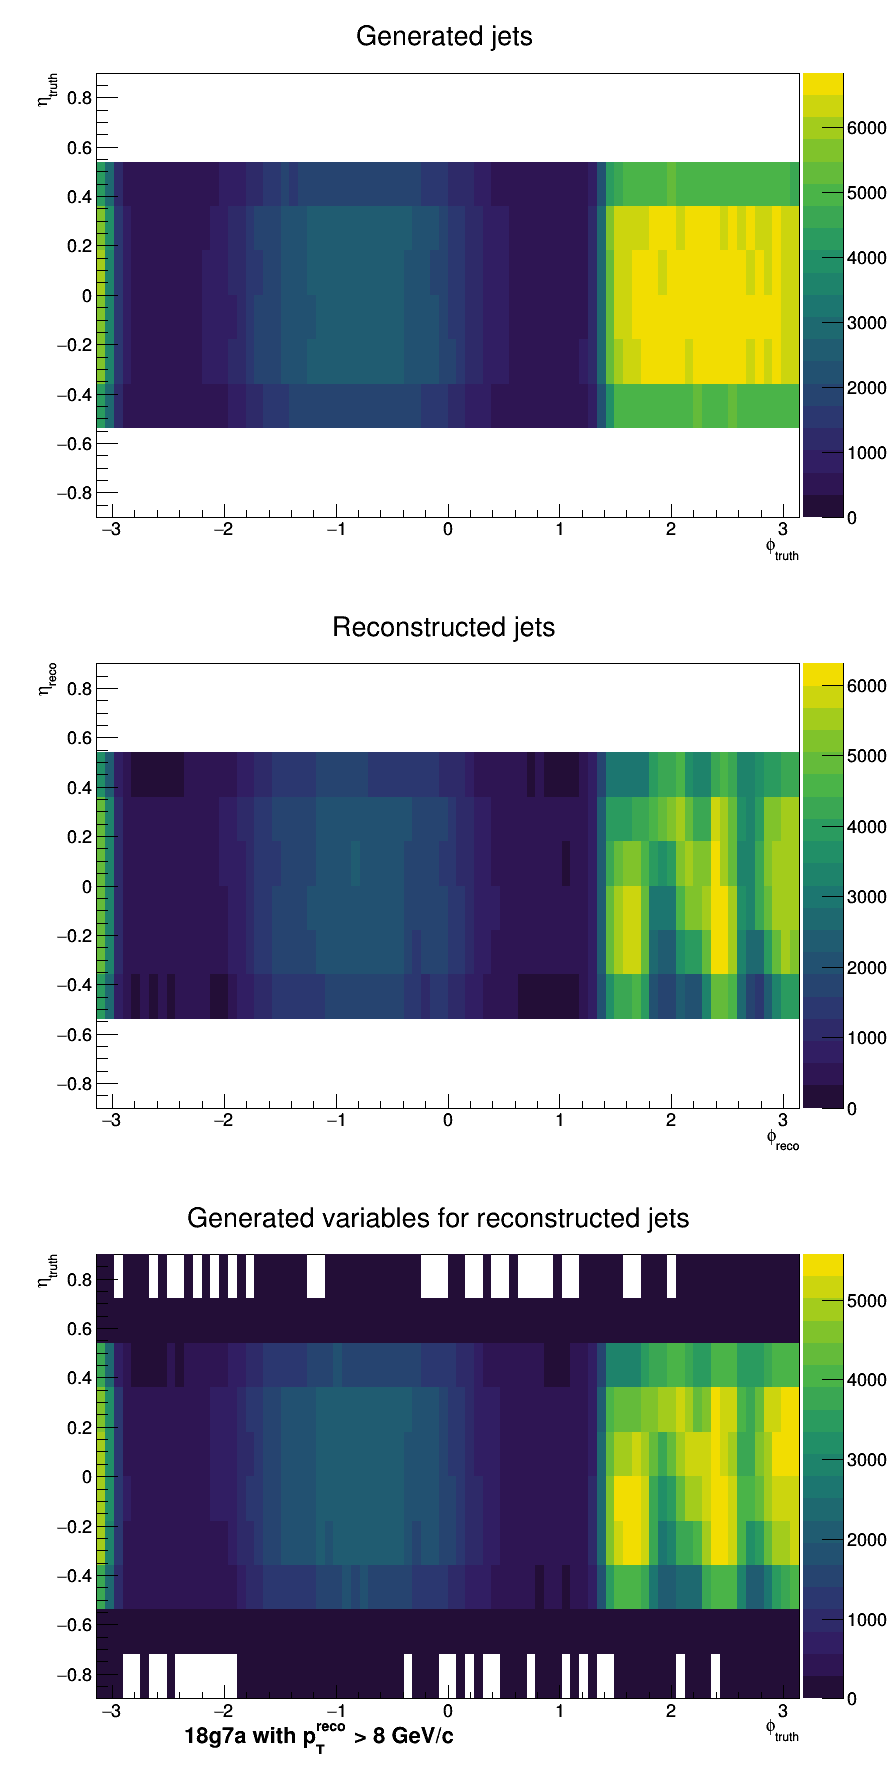

In [23]:
hTruth_etaphi.SetTitle("Generated jets;#phi_{truth};#eta_{truth}")
hRecoTruth_etaphi.SetTitle("Generated variables for reconstructed jets;#phi_{truth};#eta_{truth}")
hReco_etaphi.SetTitle("Reconstructed jets;#phi_{reco};#eta_{reco}")

c= ROOT.TCanvas('c','c',900,1800)
label = Legend(title='18g7a with p_{T}^{reco} > 8 GeV/c')
c.Divide(1,3)
c.cd(1)
hTruth_etaphi.Draw('colz')
c.cd(2)
hReco_etaphi.Draw('colz')
c.cd(3)
hRecoTruth_etaphi.Draw('colz')
label.Draw(0.2,0.02)
c.Draw()
#c.SaveAs('jets_etaPhi_its_pPb.pdf')
c.SaveAs('jets_etaPhi_its_pp_dijet.png')

59.5960402489


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file jet_phiEff_its_pp_dijet.png has been created


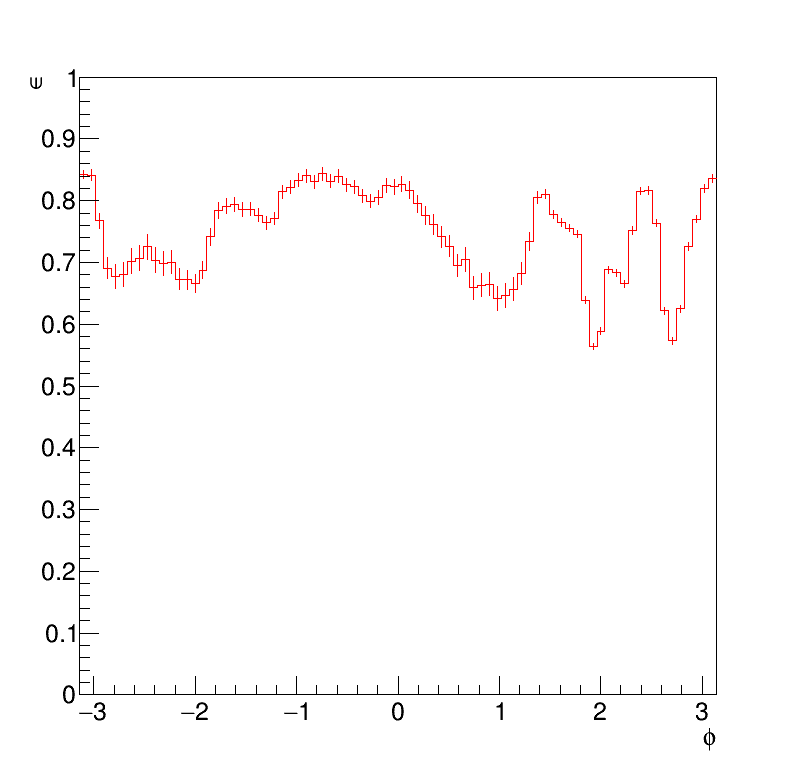

In [21]:
hReco_phi = MCfile.Get('hReco_phi_its')
hRecoTruth_phi = MCfile.Get('hRecoTruth_phi_its')
hTruth_phi = MCfile.Get('hTruth_phi_its')
#hPhi_data = Datafile.Get('hReco_phi_its')
hPhi_eff = hRecoTruth_phi.Clone()
hPhi_eff.Divide(hTruth_phi)
#hPhi_eff = h2DEff.ProjectionX()

#hPhi_data_cor = hPhi_data.Clone()

hPhi_eff.SetMinimum(0)
hPhi_eff.SetMaximum(1)
hPhi_eff.SetTitle(";#phi;#epsilon")
hPhi_eff.SetLineColor(ROOT.kRed)
c= ROOT.TCanvas('c','c',800,800)
                
hPhi_eff.Draw('histe')
c.Draw()
#c.SaveAs('jet_phiEff_its_pPb.pdf')
#c.SaveAs('jet_phiEff_its_pp_dijet.png')


#print hPhi_data.GetNbinsX()
print hPhi_eff.Integral()

#for i in range(hPhi_data.GetNbinsX()):
#    dPhi = hPhi_data.GetBinWidth(i+1)
#    dN = hPhi_data.GetBinContent(i+1)
#    dN_dPhi = dN/dPhi
#    eff = hPhi_eff.GetBinContent(i+1)
#    hPhi_data.SetBinContent(i+1,dN_dPhi)
#    hPhi_data_cor.SetBinContent(i+1,dN_dPhi/eff)
    #print dPhi, dN, dN_dPhi, eff

959462.0
959008.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file jet_phi_distribution_pp_dijet.png has been created


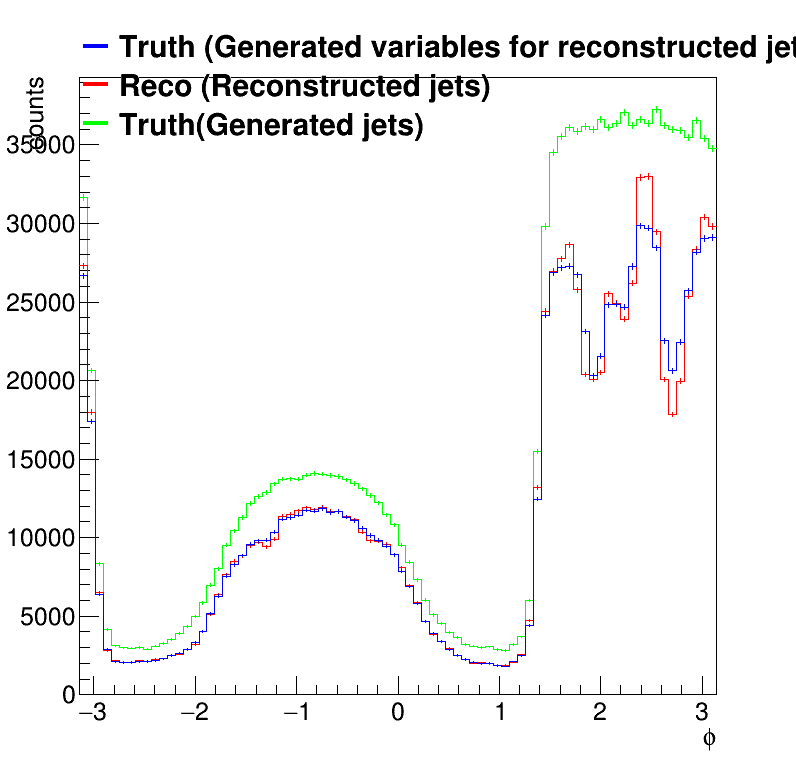

In [27]:
hReco_phi.SetLineColor(ROOT.kRed)
hReco_phi.SetMinimum(0)
hReco_phi.SetTitle(";#phi;counts")
hRecoTruth_phi.SetLineColor(ROOT.kBlue)
hRecoTruth_phi.SetMinimum(0)
hRecoTruth_phi.SetTitle(";#phi;counts")
hTruth_phi.SetLineColor(ROOT.kGreen)
hTruth_phi.SetMinimum(0)
hTruth_phi.SetTitle(";#phi;counts")

c= ROOT.TCanvas('c','c',800,800)
                
#hPhi_eff.Draw('hist')
hTruth_phi.Draw('histesame')
hReco_phi.Draw('histesame')
hRecoTruth_phi.Draw('histesame')
label = Legend("")
label.Add(hRecoTruth_phi, 'Truth (Generated variables for reconstructed jets)','L')
label.Add(hReco_phi, 'Reco (Reconstructed jets)','L')
label.Add(hTruth_phi, 'Truth(Generated jets)','L')
label.Draw(0.1,0.99)
c.Draw()
c.SaveAs('jet_phi_distribution_pp_dijet.png')
#c.SaveAs('jet_phi_distribution_pPb_8GeV.pdf')
#label.get_title()

print hReco_phi.Integral()
print hRecoTruth_phi.Integral()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


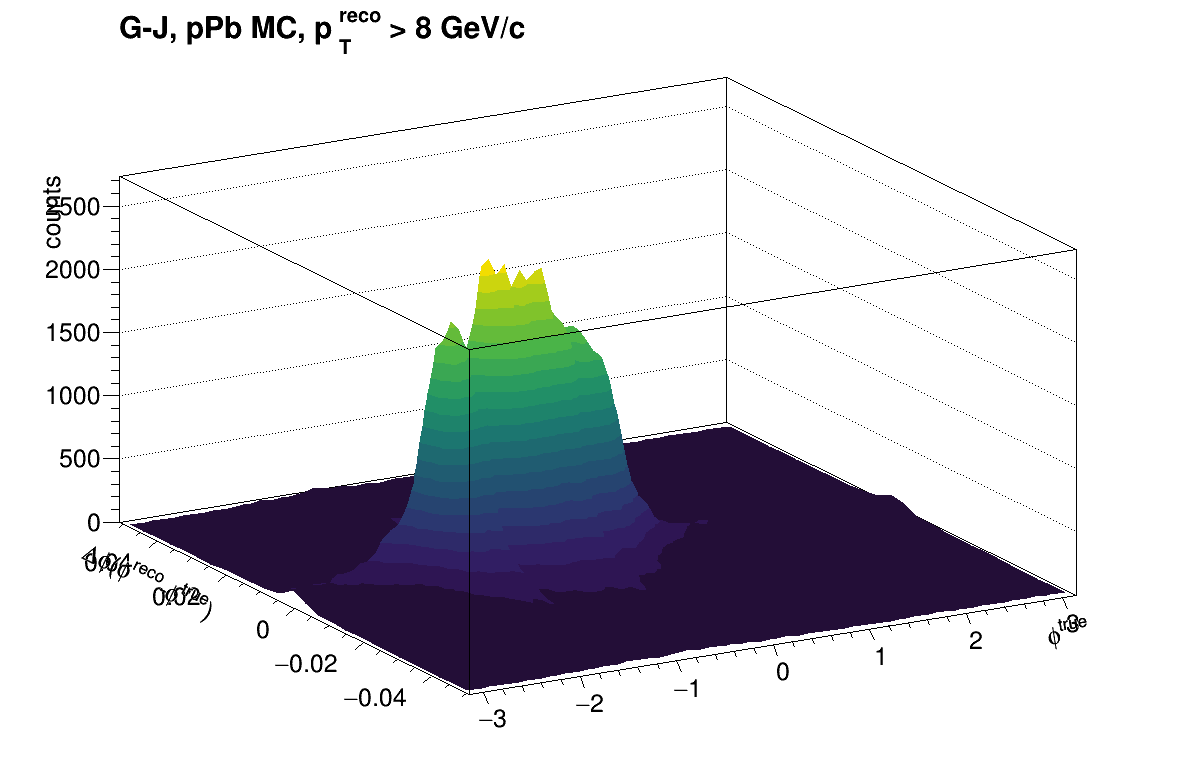

In [106]:
hRes_phi = MCfile.Get('hRes_phi_its')
hRes_phi.SetTitle(';#phi^{true};#Delta#phi(#phi^{reco}-#phi^{true})')
hRes_phi.GetYaxis().SetRangeUser(-0.05, 0.05)

c= ROOT.TCanvas('c','c',1200,800)
hRes_phi.Draw('surf2')

label = Legend("G-J, pPb MC, p_{T}^{reco} > 8 GeV/c")
label.Draw(0.1,0.95)

c.Draw()
#c.SaveAs('dphivphi_pp.pdf')
#c.SaveAs('dphivphi_pPb.png')

In [3]:
hRes_dphi = hRes_phi.ProjectionY('hRes_dphi')
c= ROOT.TCanvas('c','c',1200,800)
hRes_dphi.Draw('e')

hRMS = hRes_dphi.Clone()
hRMS.SetLineColor(ROOT.kWhite)

label = Legend("G-J, pPb MC, p_{T}^{reco} > 8 GeV/c")
label.Add(hRMS, 'RMS = 0.01')
label.Draw(0.13,0.85)

c.Draw()
#c.SaveAs('dphi_pp.pdf')
#c.SaveAs('dphi_pPb.png')

print hRes_dphi.GetRMS()
print hRes_dphi.FindBin(-0.02)
print hRes_dphi.FindBin(0.02)
print hRes_dphi.Integral(8, 19)/hRes_dphi.Integral()

NameError: name 'hRes_phi' is not defined

In [55]:
MCfile_jetFindEff_pp = ROOT.TFile('/home/dhruv/18b10a_Jets_0GeV30GeV_200K_8GeVcut_jetFinding.root')
MCfile_jetFindEff_pPb = ROOT.TFile('/home/dhruv/17g6a1_Jets_0GeV30GeV_200K_8GeVcut_jetFinding.root')

In [56]:
hWithin_its_pp = MCfile_jetFindEff_pp.Get('hRecoTruth_within_its')
hFound_its_pp = MCfile_jetFindEff_pp.Get('hRecoTruth_found_its')
jet_findEff_pp = ROOT.TGraphAsymmErrors(hFound_its_pp,hWithin_its_pp)
#jet_findEff_pp = ROOT.TEfficiency(hFound_its_pp,hWithin_its_pp)

jet_findEff_pp.SetTitle(';p_{T}^{true} [GeV/c];#epsilon')


hWithin_its_pPb = MCfile_jetFindEff_pPb.Get('hRecoTruth_within_its')
hFound_its_pPb = MCfile_jetFindEff_pPb.Get('hRecoTruth_found_its')
jet_findEff_pPb = ROOT.TGraphAsymmErrors(hFound_its_pPb,hWithin_its_pPb)
#jet_findEff_pPb = ROOT.TEfficiency(hFound_its_pPb,hWithin_its_pPb)

jet_findEff_pPb.SetTitle(';p_{T}^{true} [GeV/c];#epsilon')

Warning in <TGraphAsymmErrors::Divide>: Histograms have weights: only Normal or Bayesian error calculation is supported
Info in <TGraphAsymmErrors::Divide>: Using now the Normal approximation for weighted histograms
Warning in <TGraphAsymmErrors::Divide>: Histograms have weights: only Normal or Bayesian error calculation is supported
Info in <TGraphAsymmErrors::Divide>: Using now the Normal approximation for weighted histograms


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file jet_findEff_its.pdf has been created


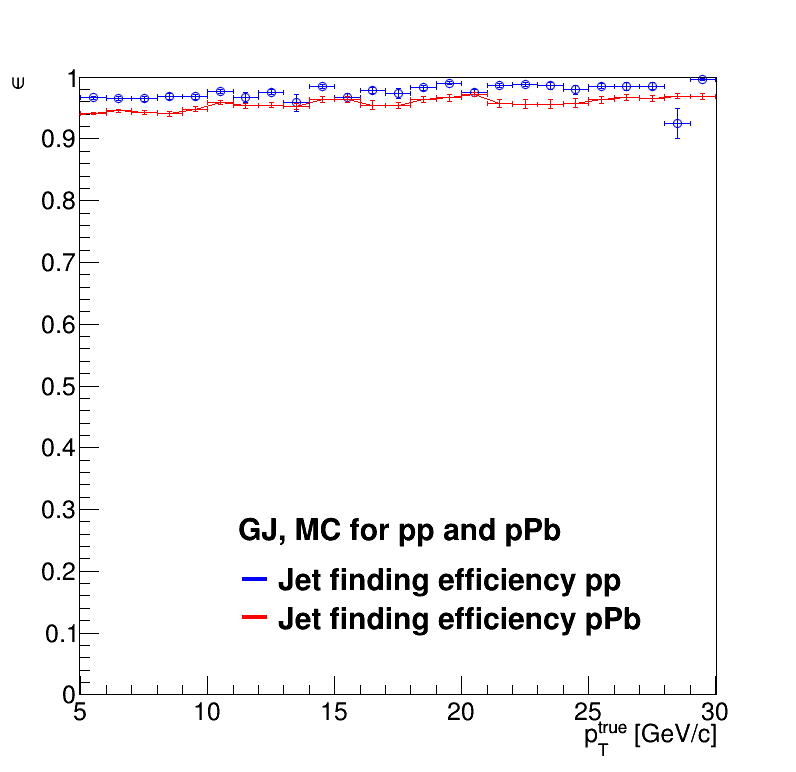

In [70]:
jet_findEff_pp.GetXaxis().SetRangeUser(5, 30)
jet_findEff_pp.GetYaxis().SetRangeUser(0.0, 1.0)
jet_findEff_pp.SetLineColor(ROOT.kBlue)
jet_findEff_pp.SetMarkerColor(ROOT.kBlue)
jet_findEff_pp.SetMarkerStyle(4)

jet_findEff_pPb.GetXaxis().SetRangeUser(5, 30)
jet_findEff_pPb.GetYaxis().SetRangeUser(0.0, 1.0)
jet_findEff_pPb.SetLineColor(ROOT.kRed)
jet_findEff_pPb.SetMarkerColor(ROOT.kRed)
jet_findEff_pPb.SetMarkerStyle(4)


c= ROOT.TCanvas('c','c',800,800)

jet_findEff_pp.Draw('APsame')
jet_findEff_pPb.Draw('same')

label = Legend("GJ, MC for pp and pPb")
label.Add(jet_findEff_pp, 'Jet finding efficiency pp','L')
label.Add(jet_findEff_pPb, 'Jet finding efficiency pPb','L')
label.Draw(0.3,0.3)

c.Draw()
#graph = jet_findEff_pp.GetPaintedGraph();
#graph.GetXaxis().SetRangeUser(5, 30)
#graph.SetMinimum(0);
#graph.SetMaximum(1);

c.SaveAs('jet_findEff_its.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


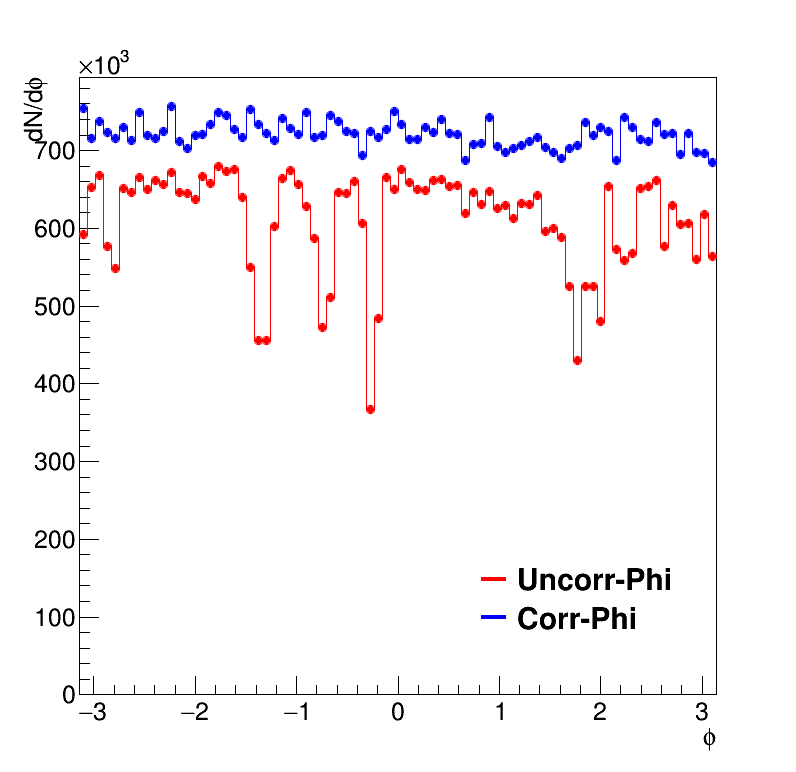

In [11]:
hPhi_data.SetTitle(';#phi;dN/d#phi')
hPhi_data.SetLineColor(ROOT.kRed)
hPhi_data.SetMarkerStyle(20)
hPhi_data.SetMarkerColor(ROOT.kRed)
hPhi_data.SetMinimum(0.0)
hPhi_data_cor.SetTitle(';#phi;dN/d#phi')
hPhi_data_cor.SetLineColor(ROOT.kBlue)
hPhi_data_cor.SetMarkerStyle(20)
hPhi_data_cor.SetMarkerColor(ROOT.kBlue)
hPhi_data_cor.SetMinimum(0.0)

c= ROOT.TCanvas('c','c',800,800)
hPhi_data_cor.Draw('histe')
hPhi_data.Draw('histesame')

label = Legend("")
label.Add(hPhi_data, 'Uncorr-Phi','L')
label.Add(hPhi_data_cor, 'Corr-Phi','L')
label.Draw(0.6,0.3)

c.Draw()
#c.SaveAs('phi_efficiency_tpc.pdf')

# ITS Resolution

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file jet_resolution.pdf has been created


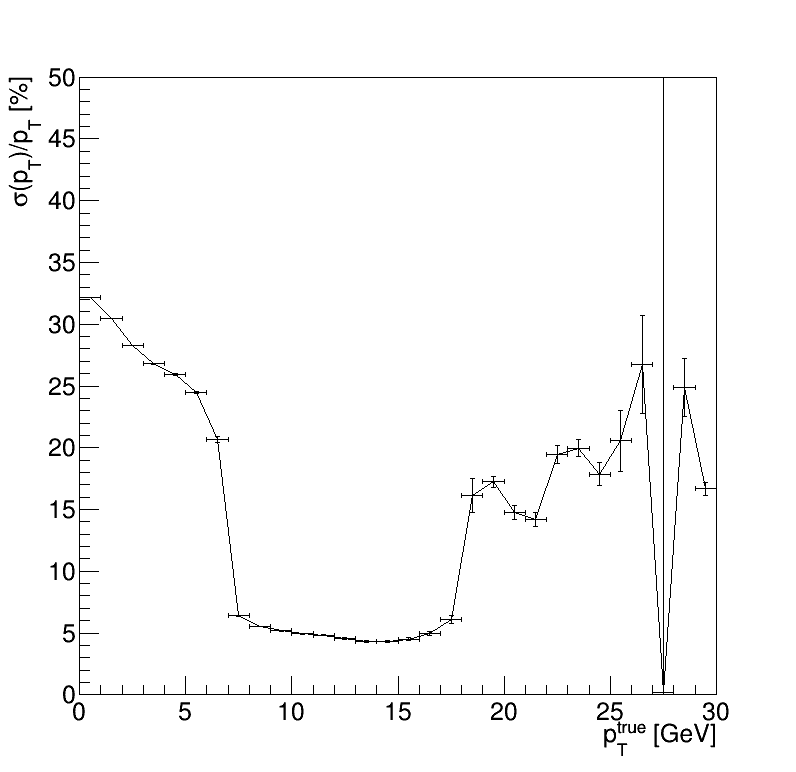

In [15]:
res_4L = MCfile.Get('g_sigma')
res_4L.SetLineColor(ROOT.kBlack)
res_4L.SetMinimum(0.0)
res_4L.GetXaxis().SetLimits(0.0,30)
res_4L.GetYaxis().SetRangeUser(0.0,50)
res_4L.SetTitle('')
c= ROOT.TCanvas('c','c',800,800)

res_4L.Draw()

#label = Legend("")
#label.Add(res_4L, 'Jet resolution','L')
#label.Draw(.2, .8)

c.Draw()
c.SaveAs('jet_resolution.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file jet_mean.pdf has been created


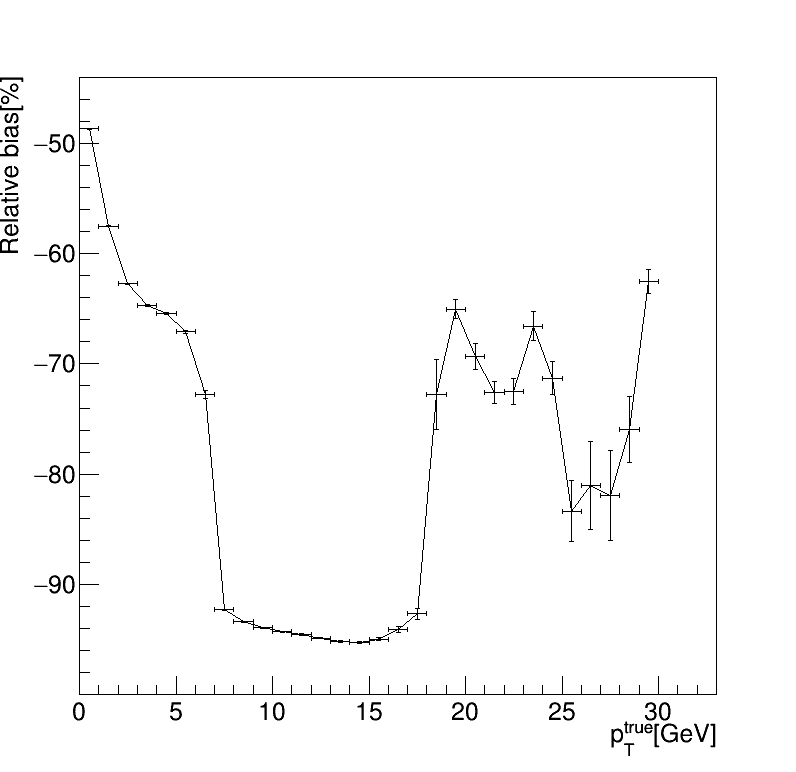

In [9]:
mean_4L = MCfile.Get('g_mean')
mean_4L.SetTitle(';')
mean_4L.SetLineColor(ROOT.kBlack)
#mean_4L.SetMinimum(0.0)
#mean_4L.GetXaxis().SetLimits(0.0,30)
#mean_4L.GetYaxis().SetRangeUser(0.0,50)
mean_4L.SetTitle(';p_{T}^{true}[GeV];Relative bias[%]')
c= ROOT.TCanvas('c','c',800,800)

mean_4L.Draw()

#label = Legend("")
#label.Add(mean_4L, '','L')
#label.Draw(.2, .8)

c.Draw()
c.SaveAs('jet_mean.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file jet_res_pt.pdf has been created


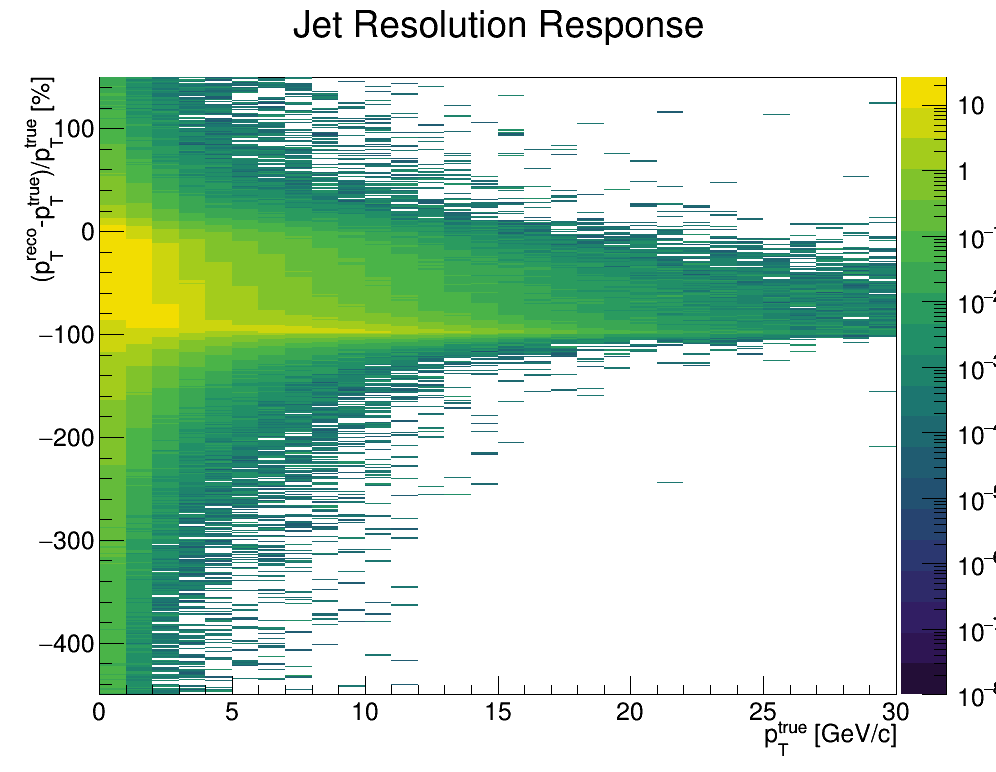

In [8]:
hRes_Pt = MCfile.Get('hRes_Pt')
hRes_Pt.SetMinimum(1E-8)
c= ROOT.TCanvas('c','c',1000,800)
c.SetLogz()
hRes_Pt.Draw("colz")
c.Draw()
c.SaveAs("jet_res_pt.pdf")

# Z Vertex Ratios

In [223]:
Datafile_zv = ROOT.TFile('/home/dhruv/fout_3_13b_pass4_v1_3run_pPb_zv_all_new.root')
MCfile_zv = ROOT.TFile('/home/dhruv/17g6a3_16_1GeV16GeV_all_new.root')

zv_data = Datafile_zv.Get('hZvertex')
zv_MC = MCfile_zv.Get('hZvertex')

zv_corection = zv_MC.clone()
zv_correction.Divide(zv_data)



AttributeError: 'TH1F' object has no attribute 'clone'